# <span style="color:red; font-weight:bold">Notebook 1</span>

### <span style="color:green; font-style:italic;">Giacomo Boringhieri 134567A</span>

## <span style="color:blue;">Introduzione</span>

In questa prima esercitazione ci avviciniamo al **metodo della media a blocchi**, uno strumento fondamentale per stimare valori medi e incertezze nelle simulazioni Monte Carlo.  
In qualsiasi simulazione Monte Carlo è essenziale valutare quantitativamente l'affidabilità dei risultati, poiché le singole osservazioni sono soggette a fluttuazioni statistiche. Senza una stima accurata dell'errore, le conclusioni tratte dai dati potrebbero risultare fuorvianti.

Il *metodo della media a blocchi* fornisce una procedura semplice ma rigorosa per stimare sia la media globale sia l'incertezza associata. L'idea principale consiste nel suddividere un insieme di $(N)$ dati generati dalla simulazione in $(M)$ blocchi di dimensione $(L = N/M)$, calcolando la media all'interno di ciascun blocco. A partire dalle medie parziali dei blocchi, è possibile stimare la media globale \(\bar{x}\) e il relativo errore statistico $(\sigma)$ tramite la formula della deviazione standard delle medie:

$$
\sigma = \sqrt{\frac{1}{M-1} \sum_{i=1}^{M} (\bar{x}_i - \bar{x})^2}
$$

dove $(\bar{x}_i)$ è la media del blocco $(i)$ e $(\bar{x})$ rappresenta la media globale dei dati.

Questo approccio non solo permette di ottenere un'indicazione quantitativa sull'incertezza dei risultati, ma è anche particolarmente utile quando i dati sono correlati o quando si vuole monitorare la **convergenza della media stimata** man mano che aumenta il numero di campioni.  

Nel corso del notebook applicheremo questa tecnica a semplici simulazioni Monte Carlo, mostrando passo passo come stimare correttamente l'errore statistico e come interpretare i risultati ottenuti.  
Per le simulazioni utilizzeremo un generatore di numeri pseudo-casuali (`PRNG`).

## <span style="color:blue"> Esercizio 1.1 </span>

Devo testare il generatore di numeri pseudocasuali calcolando $ \langle r \rangle = \int_0^1 r \, dr$. Per il calcolo ho fatto  $10^5$ lanci divisi in 100 blocchi. In fondo è rappresentata la stima dell'integrale in funzione del numero di blocchi ed ho verificato che l'errore seguisse la legge $1/\sqrt{N}$ (dovuta al teorema del limite centrale)."

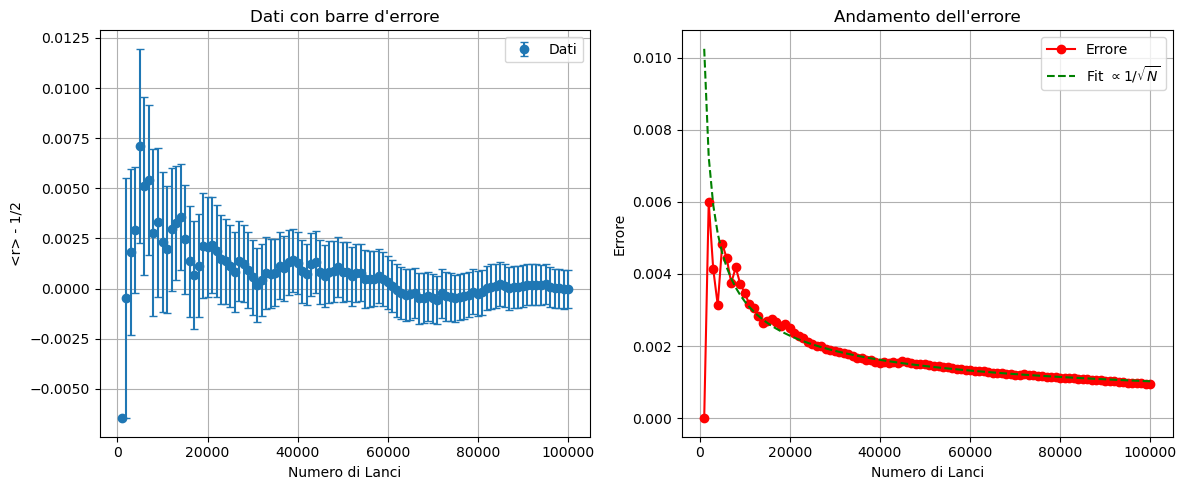

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica i dati dal file
data = np.loadtxt("es1/data_1_1.dat")

# Estrai le colonne
x = data[:, 0]   # Numero di lanci
y = data[:, 1]   # Valori medi
err = data[:, 2] # Errori

# Definisci la funzione 1/sqrt(N)
def error_model(N, a):
    return a / np.sqrt(N)

# Seleziona solo i dati con x >= 20000 per il fit
mask = x >= 20000
x_fit = x[mask]
err_fit = err[mask]

# Fitting dei dati selezionati
popt, pcov = curve_fit(error_model, x_fit, err_fit)
a_fit = popt[0]

# Crea due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Primo grafico: dati con barre d'errore
ax1.errorbar(x, y - 0.5, yerr=err, fmt='o', capsize=3, label="Dati")
ax1.set_xlabel("Numero di Lanci")
ax1.set_ylabel("<r> - 1/2")
ax1.set_title("Dati con barre d'errore")
ax1.grid(True)
ax1.legend()

# Secondo grafico: errore con fit 1/sqrt(N) da x >= 20000
ax2.plot(x, err, 'r-o', label="Errore")
ax2.plot(x, error_model(x, a_fit), 'g--', label=r"Fit $\propto 1/\sqrt{N}$")
ax2.set_xlabel("Numero di Lanci")
ax2.set_ylabel("Errore")
ax2.set_title("Andamento dell'errore")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Calcolo di $\sigma^2=\int_0^1 {(r-1/2)}^2 \, dr$. Analogo al caso precedente.

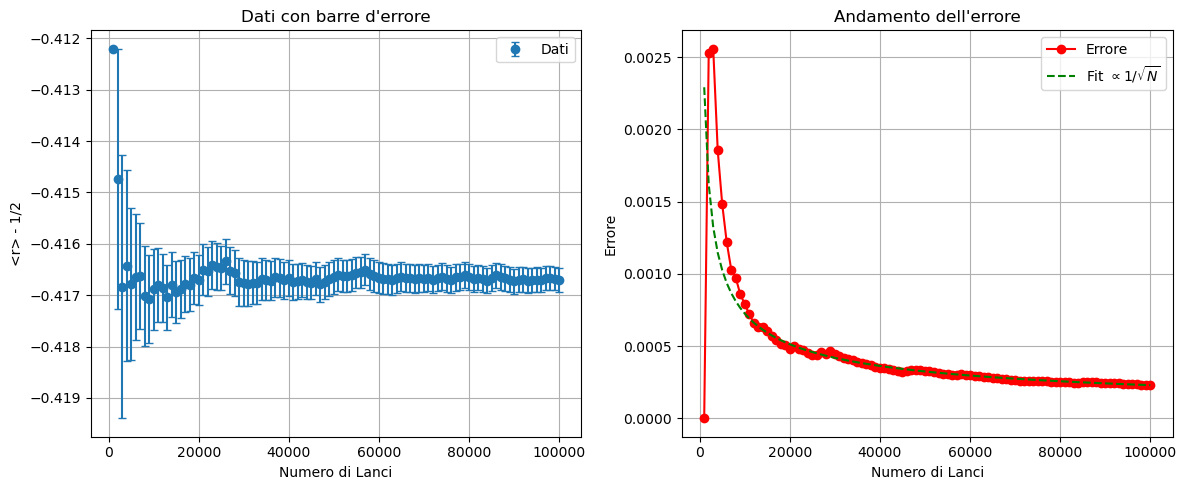

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica i dati dal file
data = np.loadtxt("es1/data_1_2.dat")

# Estrai le colonne
x = data[:, 0]   # Numero di lanci
y = data[:, 1]   # Valori medi
err = data[:, 2] # Errori

# Definisci la funzione 1/sqrt(N)
def error_model(N, a):
    return a / np.sqrt(N)

# Seleziona solo i dati con x >= 20000 per il fit
mask = x >= 10000
x_fit = x[mask]
err_fit = err[mask]

# Fitting dei dati selezionati
popt, pcov = curve_fit(error_model, x_fit, err_fit)
a_fit = popt[0]

# Crea due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Primo grafico: dati con barre d'errore
ax1.errorbar(x, y - 0.5, yerr=err, fmt='o', capsize=3, label="Dati")
ax1.set_xlabel("Numero di Lanci")
ax1.set_ylabel("<r> - 1/2")
ax1.set_title("Dati con barre d'errore")
ax1.grid(True)
ax1.legend()

# Secondo grafico: errore con fit 1/sqrt(N) da x >= 20000
ax2.plot(x, err, 'r-o', label="Errore")
ax2.plot(x, error_model(x, a_fit), 'g--', label=r"Fit $\propto 1/\sqrt{N}$")
ax2.set_xlabel("Numero di Lanci")
ax2.set_ylabel("Errore")
ax2.set_title("Andamento dell'errore")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Si è ipotizzato che i valori di $r$ siano estratti da una distribuzione uniforme. In statistica, tuttavia, non è possibile dimostrare in modo assoluto che eventi randomici siano estratti da una particolare distribuzione: possiamo solo valutare quanto i dati siano coerenti con un certo modello. Inoltre, l’ipotesi di uniformità è in realtà approssimativa, poiché i numeri pseudo-randomici sono generati da algoritmi deterministici e non sono perfettamente casuali. Possiamo comunque stimare la probabilità che i valori di r non siano estratti da una distribuzione uniforme, ad esempio utilizzando test statistici come il chi-quadro $(\chi^2)$. Se tale probabilità risulta molto bassa, possiamo ragionevolmente rigettare l’ipotesi di uniformità e concludere che i dati presentano deviazioni significative rispetto al modello teorico.

Per verificare l'uniformità dei numeri pseudo-casuali generati, l'intervallo $[0,1]$ è stato suddiviso in $M = 10^2$ sottointervalli di ampiezza uguale. Per ciascun blocco di $n = 10^4$ numeri, è stato contato il numero di valori $n_i$ caduti in ciascun sottointervallo e calcolata la statistica

$$
\chi^2_j = \sum_{i=1}^{M} \frac{(n_i - n/M)^2}{n/M} = \sum_{i=1}^{M} \frac{(n_i - 100)^2}{100}.
$$

Il procedimento è stato ripetuto su $100$ blocchi consecutivi, ottenendo così $100$ valori $\chi^2_j$. Se i numeri fossero effettivamente uniformi, ci si aspetta che ciascun $\chi^2_j$ sia approssimativamente pari a $M = 100$, poiché la varianza attesa di ciascun conteggio $n_i$ è circa $100$.  

Per valutare la qualità del generatore pseudo-casuale, è stato confrontato l'istogramma dei $\chi^2_j$ ottenuti con la distribuzione teorica del $\chi^2$ a $M-1 = 99$ gradi di libertà. Valori significativamente superiori a 100 indicherebbero discrepanze rispetto all'uniformità e potrebbero suggerire che il generatore non produce numeri casuali perfettamente distribuiti uniformemente.

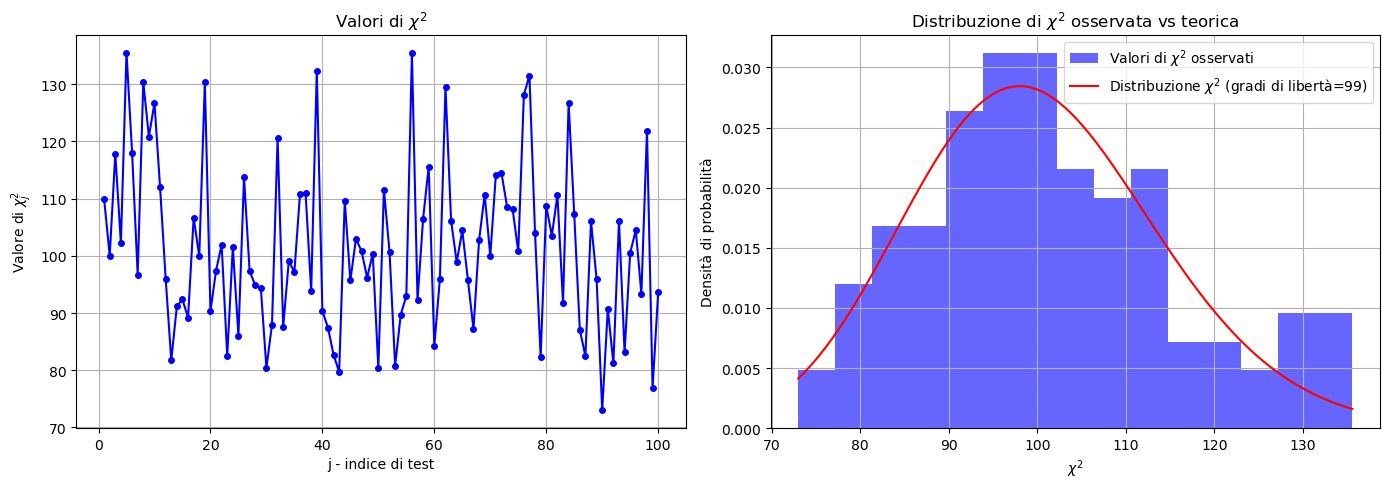

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Carico i dati dal file
data = np.loadtxt("es1/data_chi.dat")

# Creo una figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# =============================================
# Primo grafico: valori di chi^2 per ogni test
# =============================================
x = data[:, 0]   # indice j del test
y = data[:, 1]   # valori di chi^2

ax1.plot(x, y, marker='o', color='b', markersize=4)
ax1.set_xlabel("j - indice di test")
ax1.set_ylabel("Valore di $\chi_j^2$")
ax1.set_title("Valori di $\chi^2$")
ax1.grid()

# =============================================
# Secondo grafico: istogramma vs distribuzione teorica
# =============================================
M = 100  # gradi di libertà
ax2.hist(y, bins=15, density=True, alpha=0.6, color='b', 
         label='Valori di $\chi^2$ osservati')

# Distribuzione teorica
x_teor = np.linspace(min(y), max(y), 100-1)
ax2.plot(x_teor, chi2.pdf(x_teor, df=M), 'r-', 
         label=r'Distribuzione $\chi^2$ (gradi di libertà=99)')

ax2.set_xlabel(r'$\chi^2$')
ax2.set_ylabel('Densità di probabilità')
ax2.set_title(r'Distribuzione di $\chi^2$ osservata vs teorica')
ax2.legend()
ax2.grid()

# Regolo il layout e mostro la figura
plt.tight_layout()
plt.show()


## Esercizio 1.2

Ho generato gli istogrammi della variabile  

$$
S_N = \frac{1}{N} \sum_{i=1}^N x_i
$$  

calcolata su $(10^4)$ realizzazioni, considerando i casi \(N = 1, 2, 10, 100\) per ciascuna distribuzione. $x_i$ è una variabile casuale campionata da un dado standard, da una distribuzione esponenziale $(\lambda = 1)$ e da una distribuzione lorentziana $(\mu = 0, \Gamma = 1)$, considerando i casi $(N = 1, 2, 10, 100)$.

$x_i$ è campionato attraverso il metodo della *funzione cumulativa inversa*

Questo metodo si basa sull'idea che, se \(U\) è una variabile casuale uniforme in $[0,1]$ e $(F_X)$ è la funzione di distribuzione cumulativa di una variabile $(X)$, allora la variabile  

$$
X = F_X^{-1}(U)
$$  

avrà esattamente la distribuzione desiderata.  

- Per la distribuzione esponenziale  

$$
p(x) = \lambda \, e^{-\lambda x}, \quad x \in [0, +\infty),
$$  

$$
x = - \frac{\log(1-y)}{\lambda}.
$$  

- Per la distribuzione di Cauchy-Lorentz  

$$
p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2 + \Gamma^2}, \quad x \in (-\infty, +\infty),
$$  

$$
x = \mu + \Gamma \, \tan \Big( \pi \big(y - \frac{1}{2}\big) \Big).
$$

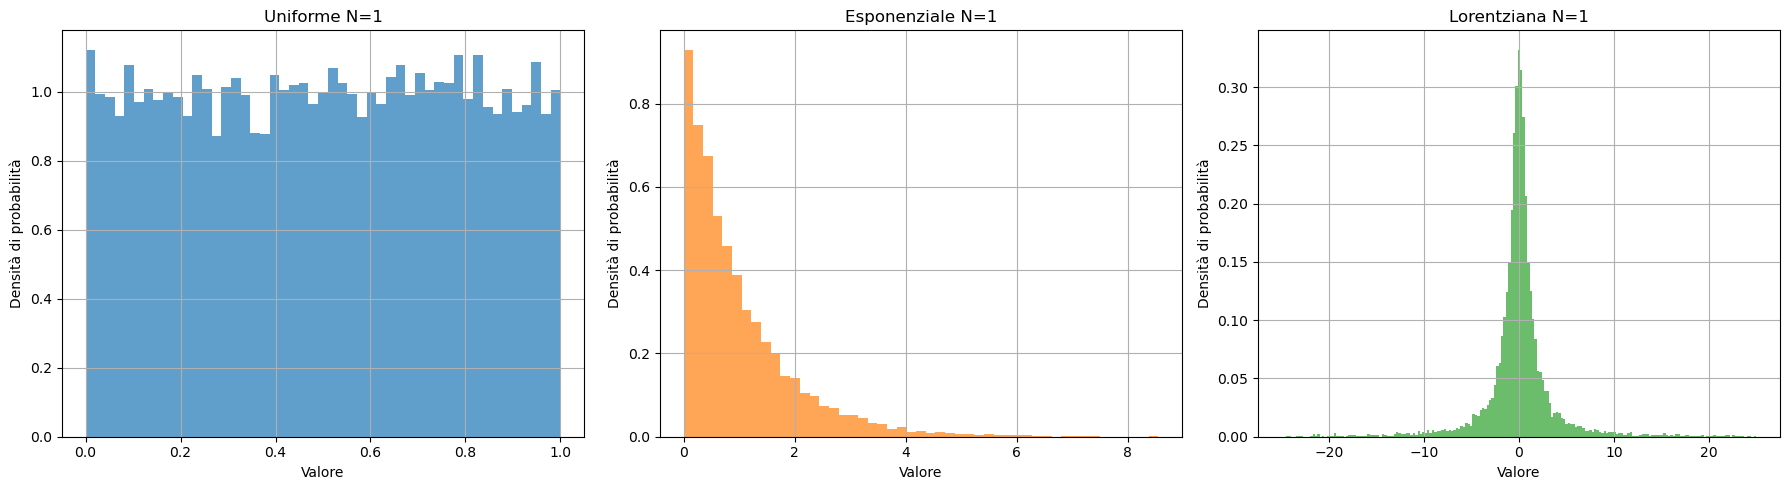

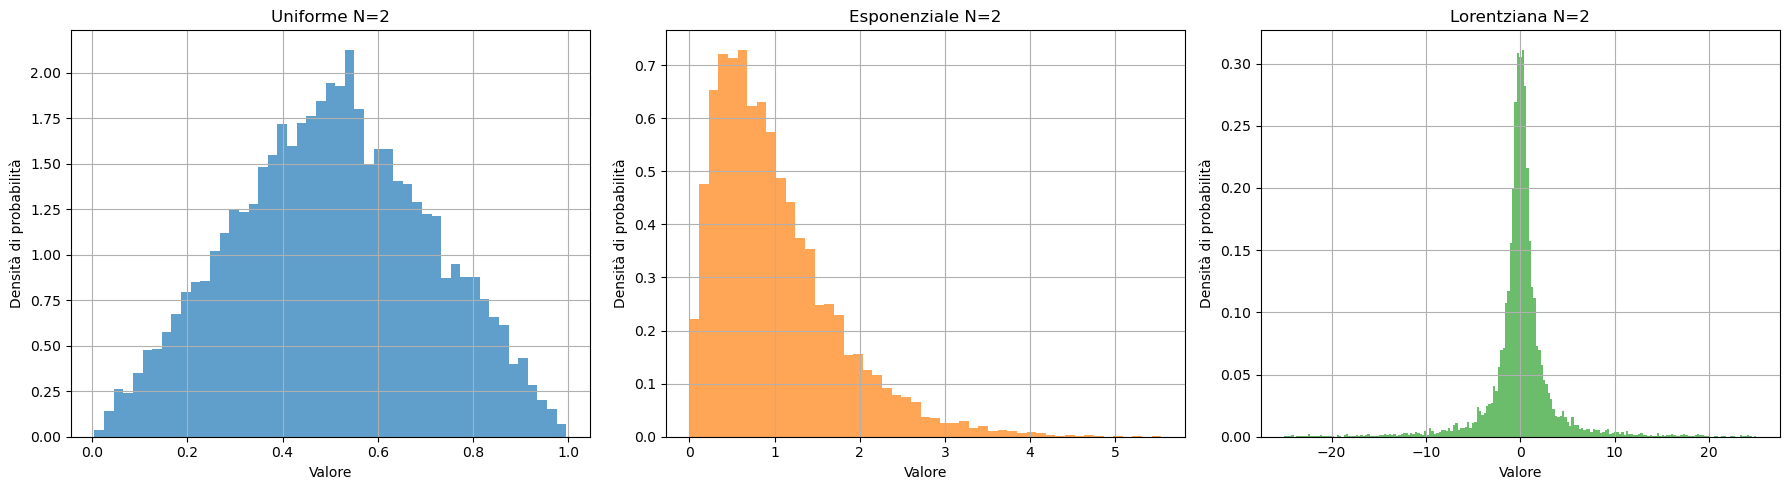

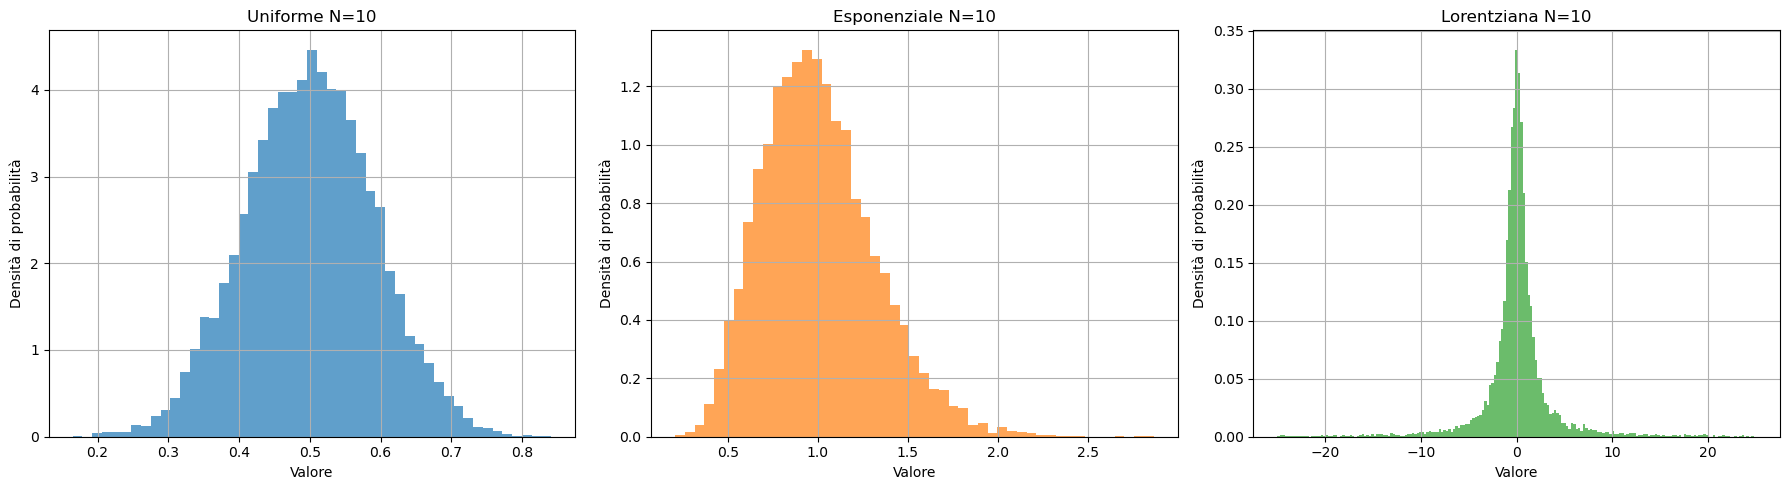

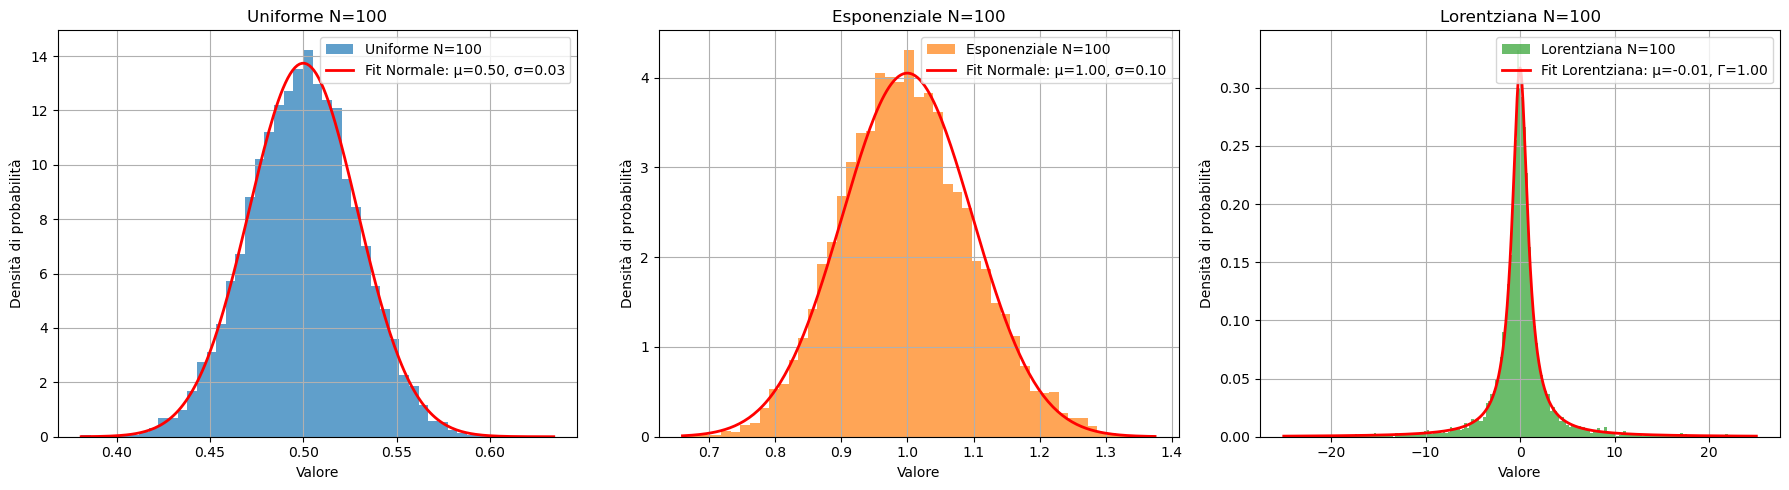

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

# Tipi di distribuzione e valori di N
dist_types = ['Uniforme', 'Esponenziale', 'Lorentziana']
N_values = [1, 2, 10, 100]

# Colori
colors = {
    'Uniforme': "#1d76b5",     # blu
    'Esponenziale': '#ff7f0e', # arancione
    'Lorentziana': '#2ca02c'   # verde
}

for N in N_values:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 riga, 3 colonne
    for idx, dist in enumerate(dist_types):
        filename = f"es2/data_N{N}.dat"
        data = np.loadtxt(filename)
        values = data[:, idx].flatten()

        # Se Lorentziana -> bins fissi, più ampi per le code
        if dist == 'Lorentziana':
            bins = np.linspace(-25, 25, 200)
        else:
            bins = np.linspace(np.min(values), np.max(values), 50)

        # Istogramma
        axes[idx].hist(values, bins=bins, density=True, alpha=0.7,
                       color=colors[dist], label=f'{dist} N={N}')
        axes[idx].set_title(f'{dist} N={N}')
        axes[idx].set_xlabel('Valore')
        axes[idx].set_ylabel('Densità di probabilità')
        axes[idx].grid(True)

        # Fit solo per N=100
        if N == 100:
            if dist in ['Uniforme', 'Esponenziale']:
                mu, sigma = norm.fit(values)
                x = np.linspace(np.min(values), np.max(values), 200)
                y = norm.pdf(x, mu, sigma)
                axes[idx].plot(x, y, color='red', lw=2,
                               label=f'Fit Normale: μ={mu:.2f}, σ={sigma:.2f}')
            elif dist == 'Lorentziana':
                mu, gamma = cauchy.fit(values)
                x = np.linspace(-25, 25, 2000)
                y = cauchy.pdf(x, loc=mu, scale=gamma)
                axes[idx].plot(x, y, color='red', lw=2,
                               label=f'Fit Lorentziana: μ={mu:.2f}, Γ={gamma:.2f}')
            axes[idx].legend()

    plt.tight_layout()
    plt.show()

Quando consideriamo la media di \(N\) variabili indipendenti, il Teorema del Limite Centrale (CLT) garantisce che, se la distribuzione ha media e varianza finite, la media tende a una distribuzione gaussiana al crescere di \(N\). Questo vale quindi per distribuzioni uniformi ed esponenziali, per le quali ha senso confrontare gli istogrammi delle medie con un fit gaussiano.  

La distribuzione lorentziana (Cauchy), invece, ha media e varianza non definite, quindi il CLT non si applica: anche per valori grandi di \(N\), la distribuzione delle medie conserva le code pesanti tipiche della Lorentziana. Per questo caso, è più appropriato usare direttamente un fit con la distribuzione di Cauchy e, per rendere leggibili gli istogrammi, si restringe l’asse a \([-25,25]\).  

Di conseguenza, aumentando \(N\), gli istogrammi di uniforme ed esponenziale diventano sempre più simili a una gaussiana, mentre quelli della Lorentziana rimangono larghi, con un picco centrale e code molto pronunciate.

## Esercizio 1.3

In questo esercizio ho implementato un esperimento di Buffon per stimare $\pi$. L'idea è semplice: lancio un ago di lunghezza $L_{\text{ago}}$ su un piano con linee parallele distanti $d$. Contando quante volte l'ago attraversa una linea, posso stimare $\pi$ tramite la formula

$$
\pi \approx \frac{2 L_{\text{ago}} \cdot \text{numero di lanci}}{\text{numero di intersezioni} \cdot d}.
$$

Ho diviso i lanci totali in blocchi per calcolare medie progressive e deviazioni standard. Ho implementato due metodi:  

1. **Metodo tradizionale**: scelgo l'angolo dell'ago uniformemente $\in [0, \pi]$.  
2. **Metodo alternativo**: genero l'angolo usando $\theta = 2 \arccos(U)$, dove $U$ è uniforme $\in [0, 1)$.  

Per entrambi i metodi ho plottato le medie progressive e gli errori stimati, così posso confrontare la convergenza della stima di $\pi$ nei due casi.

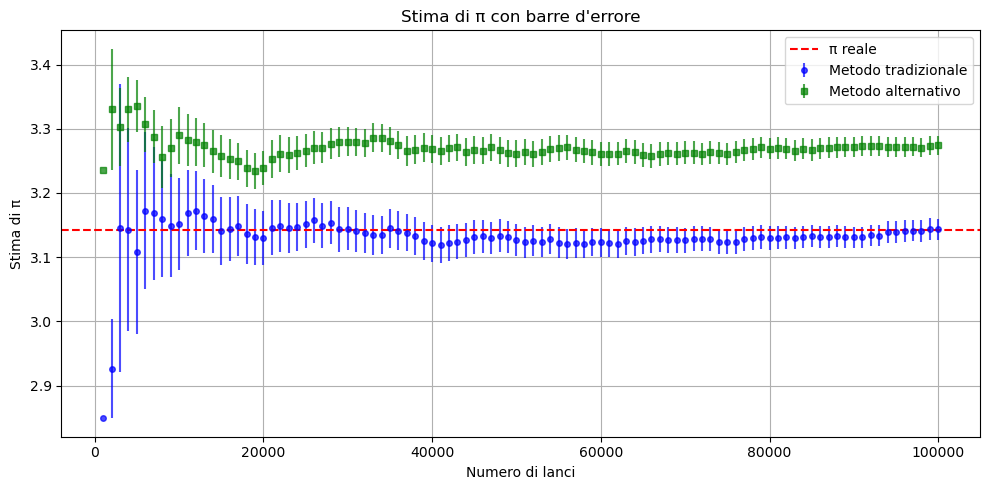

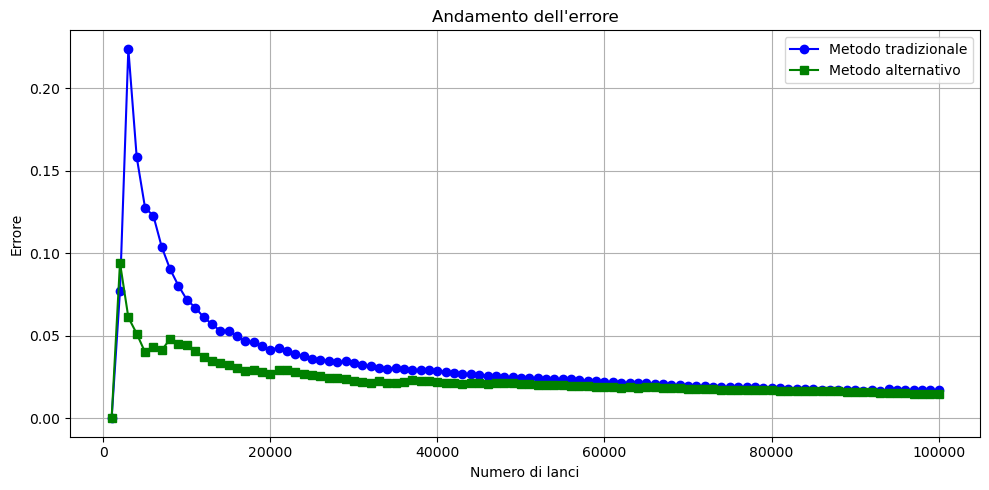

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dai file
data = np.loadtxt("es3/data.dat")
data_alt = np.loadtxt("es3/_data.dat")

# Colonne: numero_lanci, stima_pi, errore
x = data[:,0]
pi_est = data[:,1]
pi_err = data[:,2]

x_alt = data_alt[:,0]
pi_est_alt = data_alt[:,1]
pi_err_alt = data_alt[:,2]

# -----------------------
# Grafico 1: stime di π con barre d'errore
# -----------------------
plt.figure(figsize=(10,5))
plt.errorbar(x, pi_est, yerr=pi_err, fmt="o", markersize=4, alpha=0.7, label="Metodo tradizionale", color="blue")
plt.errorbar(x_alt, pi_est_alt, yerr=pi_err_alt, fmt="s", markersize=4, alpha=0.7, label="Metodo alternativo", color="green")
plt.axhline(np.pi, color="red", linestyle="--", label="π reale")
plt.xlabel("Numero di lanci")
plt.ylabel("Stima di π")
plt.title("Stima di π con barre d'errore")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------
# Grafico 2: andamento dell'errore
# -----------------------
plt.figure(figsize=(10,5))
plt.plot(x, pi_err, 'o-', color="blue", label="Metodo tradizionale")
plt.plot(x_alt, pi_err_alt, 's-', color="green", label="Metodo alternativo")
plt.xlabel("Numero di lanci")
plt.ylabel("Errore")
plt.title("Andamento dell'errore")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()